# Kaggle data preprocessing and tuning

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tracks= pd.read_csv('~/code/dmassonfr/Spotify_hit_predictor/raw_data/tracks.csv')

In [3]:
artists= pd.read_csv('~/code/dmassonfr/Spotify_hit_predictor/raw_data/artists.csv')

In [4]:
tracks.tail(1)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
586671,5Ocn6dZ3BJFPWh4ylwFXtn,Mar de Emociones,38,214360,0,['Afrosound'],['0i4Qda0k4nf7jnNHmSNpYv'],2015-07-01,0.686,0.723,6,-7.067,1,0.0363,0.105,0.0,0.264,0.975,112.204,4


In [5]:
tracks['release_year'] = [int(i.split('-')[0]) for i in tracks['release_date']]

In [6]:
tracks = tracks[tracks['speechiness']<0.66]

# Datasets Analysis

In [7]:
popularity= tracks['popularity'].value_counts()

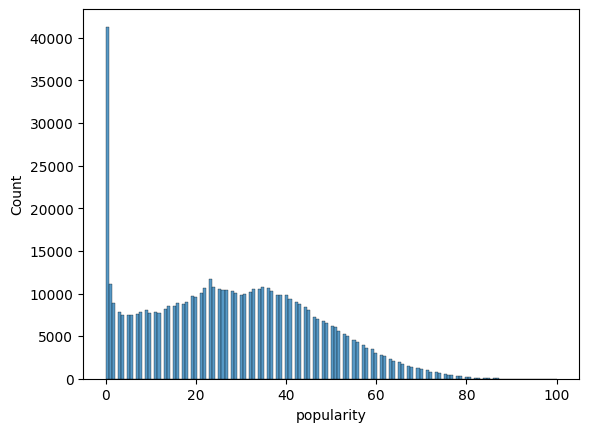

In [8]:
sns.histplot(tracks['popularity']);

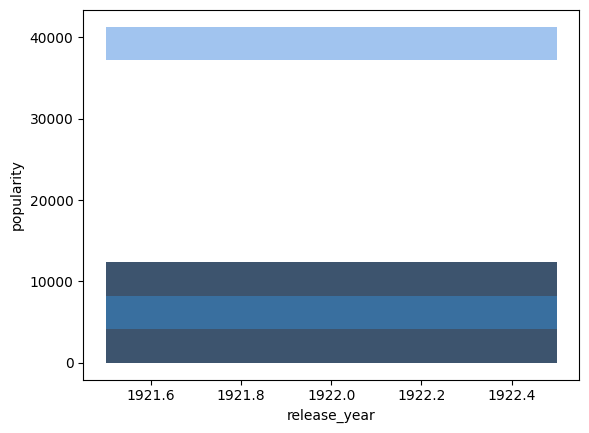

In [9]:
sns.histplot(tracks, x= tracks['release_year'], y= popularity);

In [10]:
years= tracks['release_year'].value_counts()

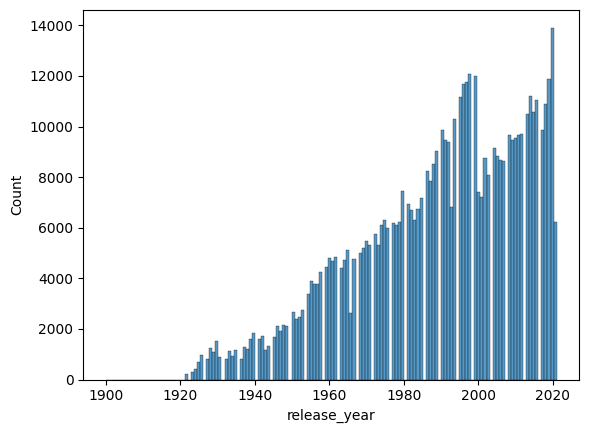

In [11]:
sns.histplot(tracks['release_year']);

## Analysing by Periods

### Dividing the data by 10 periods

In [12]:
round(len(tracks)/10)

56406

In [13]:
tracks= tracks.sort_values(by= 'release_year')

In [14]:
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
478627,74CSJTE5QQp1e4bHzm3wti,Maldita sea la primera vez,19,233920,0,['Los Pincheira del Sur'],['1BnQrx8p0bHBpidjIGq26z'],1900-01-01,0.659,0.791,...,-4.895,1,0.0295,0.139,0.000002,0.161,0.956,141.999,4,1900
132317,14uzVmei9VUtTXy3hpRD6D,Learn to do the strut,0,192279,0,"['Vincent Lopez and his Orchestra', 'Vincent L...","['1NElogFmaZxxGVsKS6hvl2', '3wxzXhMAoYbpJDXtBx...",1922,0.368,0.332,...,-11.676,1,0.0398,0.996,0.929000,0.150,0.562,175.243,4,1922
132316,14DkYjtUoZZr3BSssBimYU,Rum and coca cola,1,186850,0,"['Abe Lyman’s Orchestra', 'Abe Lyman']","['6LxnbCQ3ZrKj1lvC1lylS5', '3cNzWID6yZ1HN8qj4g...",1922,0.756,0.652,...,-5.056,0,0.0575,0.532,0.000000,0.666,0.941,91.478,4,1922
132315,12VN7yyLDADH7k5BJbyO3j,Good morning,0,168303,0,"['Abe Lyman’s Orchestra', 'Abe Lyman']","['6LxnbCQ3ZrKj1lvC1lylS5', '3cNzWID6yZ1HN8qj4g...",1922,0.645,0.314,...,-5.161,1,0.0446,0.954,0.000032,0.286,0.765,170.844,4,1922
132314,0wG1anJSasIRZ8wu9vvYOC,My baby just cares for me,0,160000,0,"['Isham Jones & His Orchestra', 'Isham Jones']","['65A1WinXDUhVkZD98s8kKU', '4OWTlYl5kkhaZEsyjU...",1922,0.762,0.493,...,-7.148,1,0.0403,0.989,0.256000,0.162,0.863,98.832,4,1922


In [15]:
# Splitting data into 10 samples
tracks_1= tracks.iloc[:56406]
tracks_2= tracks.iloc[56406:112812]
tracks_3= tracks.iloc[112812:169218]
tracks_4= tracks.iloc[169218:225624]
tracks_5= tracks.iloc[225624:282030]
tracks_6= tracks.iloc[282030:338436]
tracks_7= tracks.iloc[338436:394842]
tracks_8= tracks.iloc[394842:451248]
tracks_9= tracks.iloc[451248:507654]
tracks_10= tracks.iloc[507654:]

In [26]:
print(f' Percentage of popular tracks in 1s sample: {float(len(tracks_1[tracks_1["popularity"]>50]) / float(len(tracks_1)))*100}%.')
print(f' Percentage of popular tracks in 2nd sample: {float(len(tracks_2[tracks_2["popularity"]>50]) / float(len(tracks_2)))*100}%.')
print(f' Percentage of popular tracks in 3rd sample: {float(len(tracks_3[tracks_3["popularity"]>50]) / float(len(tracks_3)))*100}%.')
print(f' Percentage of popular tracks in 4th sample: {float(len(tracks_4[tracks_4["popularity"]>50]) / float(len(tracks_4)))*100}%.')
print(f' Percentage of popular tracks in 5th sample: {float(len(tracks_5[tracks_5["popularity"]>50]) / float(len(tracks_5)))*100}%.')
print(f' Percentage of popular tracks in 6th sample: {float(len(tracks_6[tracks_6["popularity"]>50]) / float(len(tracks_6))*100)}%.')
print(f' Percentage of popular tracks in 7th sample: {float(len(tracks_7[tracks_7["popularity"]>50]) / float(len(tracks_7)))*100}%.')
print(f' Percentage of popular tracks in 8th sample: {float(len(tracks_8[tracks_8["popularity"]>50]) / float(len(tracks_8)))*100}%.')
print(f' Percentage of popular tracks in 9th sample: {float(len(tracks_9[tracks_9["popularity"]>50]) / float(len(tracks_9)))*100}%.')
print(f' Percentage of popular tracks in 10th sample: {float(len(tracks_10[tracks_10["popularity"]>50]) / float(len(tracks_10)))*100}%.')

 Percentage of popular tracks in 1s sample: 0.17551324327199233%.
 Percentage of popular tracks in 2nd sample: 2.2940821898379604%.
 Percentage of popular tracks in 3rd sample: 4.066943232989399%.
 Percentage of popular tracks in 4th sample: 4.706946069567067%.
 Percentage of popular tracks in 5th sample: 5.903627273694288%.
 Percentage of popular tracks in 6th sample: 6.9531610112399385%.
 Percentage of popular tracks in 7th sample: 12.723823706697868%.
 Percentage of popular tracks in 8th sample: 18.214374357337874%.
 Percentage of popular tracks in 9th sample: 23.802432365351205%.
 Percentage of popular tracks in 10th sample: 44.459612793418906%.
